In [2]:
#Q3 -> 1. 

import os

# Set the path to the directory where the files are stored
data_dir = "./languageID"

# Get the list of filenames in the directory
file_list = os.listdir(data_dir)

# Filter files for the training set (0.txt to 9.txt for each language)
train_files = [file for file in file_list if file[1:4] == '.txt' and int(file[2:4]) <= 9]

# Count the number of documents for each language
lang_counts = {'e': 0, 'j': 0, 's': 0}
for file in train_files:
    lang = file[0]
    lang_counts[lang] += 1

# Calculate the prior probabilities using additive smoothing
alpha = 0.5
total_docs = sum(lang_counts.values())
k = len(lang_counts)

priors = {}
for lang, count in lang_counts.items():
    priors[lang] = (count + alpha) / (total_docs + k*alpha)

print(priors)


{'e': 0.3333333333333333, 'j': 0.3333333333333333, 's': 0.3333333333333333}


In [3]:
#Q3 -> 2. & 3.

import string
import os

def calculate_theta(docs, alpha=0.5):
    # Initialize the counts for all characters to alpha (additive smoothing)
    char_counts = {char: alpha for char in string.ascii_lowercase + ' '}
    
    # Total number of characters in the documents
    total_chars = 0

    # Count the characters
    for doc in docs:
        for char in doc:
            if char in char_counts:
                char_counts[char] += 1
                total_chars += 1

    # Calculate the probabilities using the additive smoothing formula
    d = 27  # Vocabulary size
    theta = [(count / (total_chars + alpha * d)) for count in char_counts.values()]
    
    return theta

# Directory where the files are located
directory_path = 'languageID/'

# Read in English training documents
english_docs = []
japanese_docs = []
spanish_docs = []
for i in range(10):
    with open(os.path.join(directory_path, f'e{i}.txt'), 'r') as file:
        english_docs.append(file.read())
    with open(os.path.join(directory_path, f'j{i}.txt'), 'r') as file:
        japanese_docs.append(file.read())
    with open(os.path.join(directory_path, f's{i}.txt'), 'r') as file:
        spanish_docs.append(file.read())

theta_e = calculate_theta(english_docs)
theta_j = calculate_theta(japanese_docs)
theta_s = calculate_theta(spanish_docs)

print("Theta_e:")
for prob in theta_e:
    print(f"{prob:.4f}")
    
print("\nTheta_j:")
for prob in theta_j:
    print(f"{prob:.4f}")
    
print("\nTheta_s:")
for prob in theta_s:
    print(f"{prob:.4f}")


Theta_e:
0.0602
0.0111
0.0215
0.0220
0.1054
0.0189
0.0175
0.0472
0.0554
0.0014
0.0037
0.0290
0.0205
0.0579
0.0645
0.0168
0.0006
0.0538
0.0662
0.0801
0.0267
0.0093
0.0155
0.0012
0.0138
0.0006
0.1792

Theta_j:
0.1318
0.0109
0.0055
0.0172
0.0602
0.0039
0.0140
0.0318
0.0970
0.0023
0.0574
0.0014
0.0398
0.0567
0.0912
0.0009
0.0001
0.0428
0.0422
0.0570
0.0706
0.0002
0.0197
0.0000
0.0142
0.0077
0.1234

Theta_s:
0.1046
0.0082
0.0375
0.0397
0.1138
0.0086
0.0072
0.0045
0.0499
0.0066
0.0003
0.0529
0.0258
0.0542
0.0725
0.0243
0.0077
0.0593
0.0658
0.0356
0.0337
0.0059
0.0001
0.0025
0.0079
0.0027
0.1683


In [4]:
# Q3 -> 4.

# Define the vocabulary
vocabulary = list("abcdefghijklmnopqrstuvwxyz ")
vocab_size = len(vocabulary)

# Initialize the dictionary with zero counts for each character
char_count = {char: 0 for char in vocabulary}

# Read the file and update the counts
with open("languageID/e10.txt", "r") as file:
    for line in file:
        for char in line:
            if char in char_count:
                char_count[char] += 1

# Convert the dictionary to a list to represent the vector
bow_vector = [char_count[char] for char in vocabulary]

print(bow_vector)

[164, 32, 53, 57, 311, 55, 51, 140, 140, 3, 6, 85, 64, 139, 182, 53, 3, 141, 186, 225, 65, 31, 47, 4, 38, 2, 498]


In [5]:
# Q3 -> 5.
import numpy as np

def compute_log_likelihood(x, theta_y):
    log_likelihood = np.sum([x[i] * np.log(theta_y[i]) for i in range(len(x))])
    return log_likelihood

# Bag-of-words count vector for the test document 'e10.txt'
x = bow_vector

# Compute likelihood for English
log_likelihood_english = compute_log_likelihood(x, theta_e)
log_likelihood_japanese = compute_log_likelihood(x, theta_j)
log_likelihood_spanish = compute_log_likelihood(x, theta_s)
print(f"Log Likelihood for English: {log_likelihood_english}")
print(f"Log Likelihood for Japanese: {log_likelihood_japanese}")
print(f"Log Likelihood for Spanish: {log_likelihood_spanish}")

Log Likelihood for English: -7841.865447060635
Log Likelihood for Japanese: -8771.433079075032
Log Likelihood for Spanish: -8467.282044010557


In [6]:
# Q3 -> 7.
import os
import glob
from collections import defaultdict

# Load Data
def load_data(folder):
    docs = []
    for filename in glob.glob(os.path.join(folder, '*.txt')):
        with open(filename, 'r', encoding='utf-8') as f:
            text = f.read().lower()
            # Remove characters that are not in our vocabulary
            text = ''.join([c for c in text if 'a' <= c <= 'z' or c == ' '])
            label = os.path.basename(filename)[0]  # Extracting the first character of filename as label
            docs.append((label, text))
    return docs

# Training the Naive Bayes Classifier
def train(docs):
    total_docs = len(docs)
    char_counts = defaultdict(lambda: defaultdict(int))
    lang_counts = defaultdict(int)
    
    for label, text in docs:
        lang_counts[label] += 1
        for char in text:
            char_counts[char][label] += 1

    # Calculate likelihoods and priors
    likelihoods = defaultdict(lambda: defaultdict(float))
    priors = {}
    
    for char, lang_dict in char_counts.items():
        for lang, count in lang_dict.items():
            likelihoods[char][lang] = (count + 1) / (sum(lang_dict.values()) + 27)  # +27 for smoothing

    for lang, count in lang_counts.items():
        priors[lang] = count / total_docs
    
    return likelihoods, priors

# Testing the Classifier
def classify(text, likelihoods, priors):
    scores = {}
    for lang, prior in priors.items():
        scores[lang] = prior
        for char in text:
            scores[lang] *= likelihoods[char][lang]
    return max(scores, key=scores.get)

# Loading dataset and split it into training and test sets
docs = load_data('languageID')
train_docs = [doc for idx, doc in enumerate(docs) if idx % 20 < 10]  # Take the first 10 out of every 20 for training
test_docs = [doc for idx, doc in enumerate(docs) if idx % 20 >= 10]  # Take the next 10 out of every 20 for testing

likelihoods, priors = train(train_docs)

# Predict and construct the confusion matrix
confusion_matrix = defaultdict(lambda: defaultdict(int))
for true_label, text in test_docs:
    predicted_label = classify(text, likelihoods, priors)
    confusion_matrix[true_label][predicted_label] += 1

# Print the confusion matrix
for true_label, predictions in confusion_matrix.items():
    print(f"True label: {true_label}")
    for predicted_label, count in predictions.items():
        print(f"Predicted {predicted_label}: {count}")
    print()


True label: e
Predicted e: 10

True label: j
Predicted e: 10

True label: s
Predicted e: 10



In [1]:
#Q4 -> 2.

# Data loading
import numpy as np
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
train_dataset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
test_dataset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

print(len(train_dataset))
print(len(test_dataset))

# Convert PyTorch tensors to numpy arrays
#conver training image data from a set of 28x28 pixel image in range [0,255]...
#...to a set of flattened vector of length 784 in range [0,1]
x_train = train_dataset.data.numpy().reshape(-1, 28*28) / 255.0
y_train = train_dataset.targets.numpy()
x_test = test_dataset.data.numpy().reshape(-1, 28*28) / 255.0
y_test = test_dataset.targets.numpy()

# # Assuming image_matrix is a numpy array or a PyTorch tensor
# plt.imshow(x_train[2], cmap='gray')  # use cmap='gray' for grayscale images
# plt.axis('off')  # to turn off the axis numbers
# plt.show()

# One-hot encode labels
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

60000
10000


In [2]:
# Neural Network Implementation:

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x) # - np.max(x))  # for numerical stability
    return exp_x / exp_x.sum(axis=1, keepdims=True)

# Initialize weights
input_dim = 28 * 28
hidden_dim = 300
output_dim = 10
lr = 0.01

# Initilizing weights randomly
W1 = np.random.randn(input_dim, hidden_dim)
W2 = np.random.randn(hidden_dim, output_dim)

# Q4.4a Initialize weights to 0
# W1 = np.zeros((input_dim, hidden_dim))
# W2 = np.zeros((hidden_dim, output_dim))

# Q4.4b Initialize weights randomly between -1 and 1
# W1 = np.random.uniform(-1, 1, (input_dim, hidden_dim))
# W2 = np.random.uniform(-1, 1, (hidden_dim, output_dim))

# Forward and backward pass
def forward_backward_pass(X, Y):
    # Forward pass
    a = np.dot(X, W1)
    z = sigmoid(a)
    b = np.dot(z, W2)
    y_hat = softmax(b)
    
    # Loss
    m = X.shape[0]
    loss = -np.sum(Y * np.log(y_hat)) / m  # + 1e-7)) / m
    
    # Backward pass
    db = y_hat - Y
    dW2 = np.dot(z.T, db)
    
    dz = np.dot(db, W2.T)
    da = dz * sigmoid_derivative(z)
    dW1 = np.dot(X.T, da)
    
    return dW1, dW2, loss


# Evaluation

def predict(X):
    a = np.dot(X, W1)
    z = sigmoid(a)
    b = np.dot(z, W2)
    y_hat = softmax(b)
    return np.argmax(y_hat, axis=1)

def evaluate(X, Y):
    y_pred = predict(X)
    correct_predictions = np.sum(y_pred == np.argmax(Y, axis=1))
    total_predictions = X.shape[0]
    accuracy = correct_predictions / total_predictions
    return accuracy

def compute_loss(X, Y):
    # Forward pass
    a = np.dot(X, W1)
    z = sigmoid(a)
    b = np.dot(z, W2)
    y_hat = softmax(b)
    
    # Loss computation
    m = X.shape[0]
    loss = -np.sum(Y * np.log(y_hat )) / m #+ 1e-7)) / m

    return loss

print(x_train.shape)

(60000, 784)


In [3]:
# Training and testing for each epoch

epochs = 25
batch_size = 64
train_losses = []
test_errors = []
test_losses = []

for epoch in range(epochs):
    total_loss = 0
    for i in range(0, x_train.shape[0], batch_size):
        X_batch = x_train[i:i+batch_size]
        Y_batch = y_train[i:i+batch_size]
        
        dW1, dW2, loss = forward_backward_pass(X_batch, Y_batch)
        
        # Update weights
        W1 -= lr * dW1
        W2 -= lr * dW2
        
        total_loss += loss

    avg_loss = total_loss / (x_train.shape[0] // batch_size)
    train_losses.append(avg_loss)
    
    test_error = 1 - evaluate(x_test, y_test)
    test_errors.append(test_error)
    
    test_loss = compute_loss(x_test, y_test)
    test_losses.append(test_loss)
    
    print(f"Epoch {epoch + 1}, Loss: {avg_loss}, Test Error: {test_error*100:.2f}%, Test Loss: {test_loss}")


Epoch 1, Loss: 0.8972878948443553, Test Error: 10.59%, Test Loss: 0.48995720776137586
Epoch 2, Loss: 0.3285804490094218, Test Error: 9.21%, Test Loss: 0.39282373710754886
Epoch 3, Loss: 0.2255410021882566, Test Error: 8.36%, Test Loss: 0.3408826234549193
Epoch 4, Loss: 0.1723138855782024, Test Error: 7.55%, Test Loss: 0.2979698668765923
Epoch 5, Loss: 0.13858348781054253, Test Error: 6.95%, Test Loss: 0.2682872913267196
Epoch 6, Loss: 0.11479940225022307, Test Error: 6.41%, Test Loss: 0.24888170018173
Epoch 7, Loss: 0.09707269288736861, Test Error: 6.01%, Test Loss: 0.23627957425694243
Epoch 8, Loss: 0.08322691583682683, Test Error: 5.79%, Test Loss: 0.22829500892667265
Epoch 9, Loss: 0.07204825808442814, Test Error: 5.76%, Test Loss: 0.2227154763929886
Epoch 10, Loss: 0.06280241382853301, Test Error: 5.66%, Test Loss: 0.21867516664328582
Epoch 11, Loss: 0.05504815347442319, Test Error: 5.55%, Test Loss: 0.21589624605894123
Epoch 12, Loss: 0.048487151070360834, Test Error: 5.46%, Test 

Test Accuracy: 95.07%


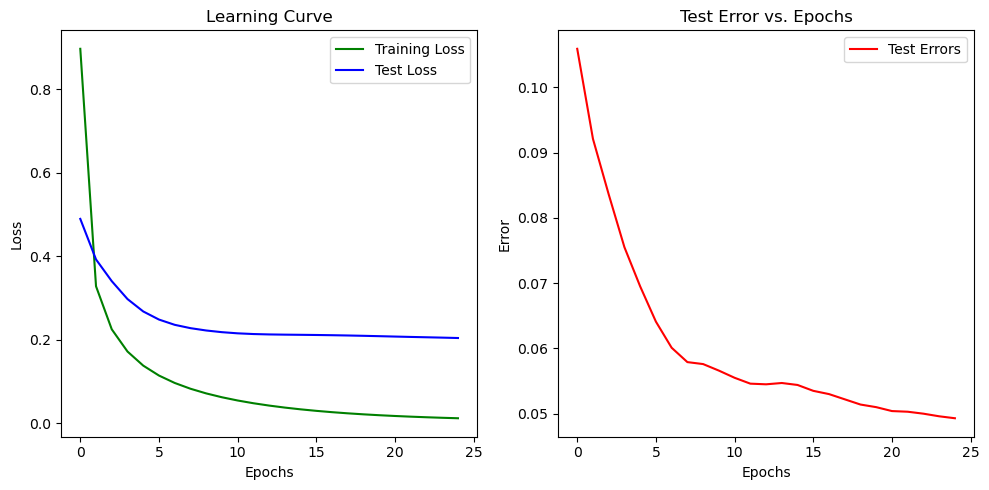

In [4]:
#Plots for learning curve and test errors

accuracy = 1-test_error
print(f"Test Accuracy: {accuracy*100:.2f}%")

import matplotlib.pyplot as plt

# Plot training loss and test loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Training Loss', color = 'g')
plt.plot(range(epochs), test_losses, label='Test Loss', color = 'b')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot test errors
plt.subplot(1, 2, 2)
plt.plot(range(epochs), test_errors, label='Test Errors', color='r')
plt.title('Test Error vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()

plt.tight_layout()
plt.show()


In [1]:
# Q4 -> 3.

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the neural network
class NeuralNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x


In [2]:
# Hyperparameters
input_dim = 784
hidden_dim = 300
output_dim = 10
learning_rate = 0.01
epochs = 25
batch_size = 64

# Data loaders
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the neural network and define the loss and optimizer
model = NeuralNet(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        # Flatten the images
        images = images.view(-1, 28*28)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    # Calculate training accuracy for the epoch
    _, train_predicted = torch.max(outputs.data, 1)
    train_correct = (train_predicted == labels).sum().item()
    train_accuracy = 100 * train_correct / labels.size(0)
    train_accuracies.append(train_accuracy)

    # Testing loop for each epoch
    test_loss = 0.0
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    test_accuracy = 100 * correct / total
    test_accuracies.append(test_accuracy)
    
    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")
#     print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_train_loss:.4f}")


Epoch [1/25], Train Loss: 1.6624, Test Loss: 1.6021, Train Accuracy: 90.62%, Test Accuracy: 85.84%
Epoch [2/25], Train Loss: 1.5386, Test Loss: 1.5045, Train Accuracy: 93.75%, Test Accuracy: 95.82%
Epoch [3/25], Train Loss: 1.5019, Test Loss: 1.4995, Train Accuracy: 100.00%, Test Accuracy: 96.28%
Epoch [4/25], Train Loss: 1.4956, Test Loss: 1.4999, Train Accuracy: 93.75%, Test Accuracy: 96.31%
Epoch [5/25], Train Loss: 1.4923, Test Loss: 1.4964, Train Accuracy: 96.88%, Test Accuracy: 96.56%
Epoch [6/25], Train Loss: 1.4920, Test Loss: 1.4944, Train Accuracy: 100.00%, Test Accuracy: 96.71%
Epoch [7/25], Train Loss: 1.4890, Test Loss: 1.4954, Train Accuracy: 93.75%, Test Accuracy: 96.62%
Epoch [8/25], Train Loss: 1.4877, Test Loss: 1.4938, Train Accuracy: 93.75%, Test Accuracy: 96.85%
Epoch [9/25], Train Loss: 1.4872, Test Loss: 1.4935, Train Accuracy: 93.75%, Test Accuracy: 96.79%
Epoch [10/25], Train Loss: 1.4864, Test Loss: 1.4932, Train Accuracy: 100.00%, Test Accuracy: 96.81%
Epoch 

In [3]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the model on the 10000 test images: 97.21 %


Text(0.5, 1.0, 'Learning Curve')

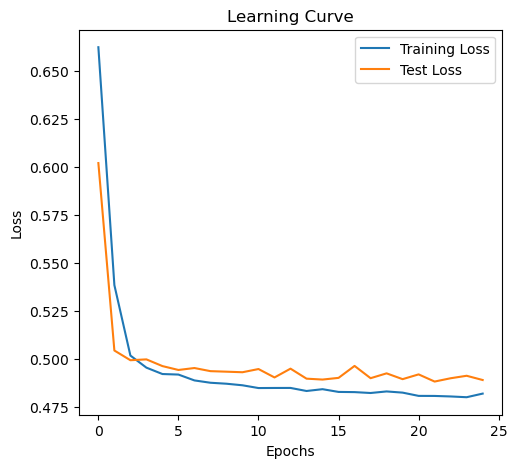

In [12]:
# import numpy as np
# plt.plot(train_losses)
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Learning Curve')
# plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), test_losses , label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')

# plt.subplot(1, 2, 2)
# plt.plot(range(epochs), train_accuracies, label='Training Accuracy')
# plt.plot(range(epochs), test_accuracies, label='Test Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy (%)')
# plt.ylim(0,100)
# plt.legend()
# plt.title('Training and Test Accuracy vs. Epochs')
# plt.tight_layout()
# plt.show()



In [ ]:
# Outputs for 4.2 implementation :
# Plot name saved as graph4.2_final
'''
Test Accuracy: 94.93%

Epoch 1, Loss: 0.8559484664225033, Test Error: 10.60%, Test Loss: 0.5114992568113094
Epoch 2, Loss: 0.3343276470294684, Test Error: 8.68%, Test Loss: 0.3768122001507692
Epoch 3, Loss: 0.227792057082367, Test Error: 7.81%, Test Loss: 0.32563794582220446
Epoch 4, Loss: 0.1730715154135165, Test Error: 7.20%, Test Loss: 0.29184282537617723
Epoch 5, Loss: 0.1385281955719691, Test Error: 6.84%, Test Loss: 0.26873095904303235
Epoch 6, Loss: 0.11446794016753266, Test Error: 6.56%, Test Loss: 0.2550889820454381
Epoch 7, Loss: 0.09660978856100337, Test Error: 6.36%, Test Loss: 0.2468028020777326
Epoch 8, Loss: 0.08263608830358572, Test Error: 6.21%, Test Loss: 0.24163843311161404
Epoch 9, Loss: 0.07134603904375814, Test Error: 6.03%, Test Loss: 0.23748881697056368
Epoch 10, Loss: 0.0620198770327648, Test Error: 5.98%, Test Loss: 0.23379141108286894
Epoch 11, Loss: 0.05421949675074148, Test Error: 5.95%, Test Loss: 0.23068044317529252
Epoch 12, Loss: 0.04763661688908432, Test Error: 5.79%, Test Loss: 0.2281200063628971
Epoch 13, Loss: 0.04203116935489322, Test Error: 5.69%, Test Loss: 0.22602538084020415
Epoch 14, Loss: 0.03723040303913299, Test Error: 5.61%, Test Loss: 0.22439917082332914
Epoch 15, Loss: 0.03308326965594298, Test Error: 5.49%, Test Loss: 0.2231505290800226
Epoch 16, Loss: 0.029472504630932664, Test Error: 5.42%, Test Loss: 0.222142562671598
Epoch 17, Loss: 0.026320922646280238, Test Error: 5.36%, Test Loss: 0.22128860099023467
Epoch 18, Loss: 0.02357417074771956, Test Error: 5.30%, Test Loss: 0.22051147495037876
Epoch 19, Loss: 0.021183307874318463, Test Error: 5.30%, Test Loss: 0.2197865757833087
Epoch 20, Loss: 0.019103652930026964, Test Error: 5.25%, Test Loss: 0.21911594627382447
Epoch 21, Loss: 0.017293539495879397, Test Error: 5.19%, Test Loss: 0.21849218485916616
Epoch 22, Loss: 0.015713432961963314, Test Error: 5.15%, Test Loss: 0.2179073102857365
Epoch 23, Loss: 0.014329439847256854, Test Error: 5.12%, Test Loss: 0.21734883780326186
Epoch 24, Loss: 0.013113121811372015, Test Error: 5.07%, Test Loss: 0.21680060814107574
Epoch 25, Loss: 0.012040985261785623, Test Error: 5.07%, Test Loss: 0.21625523304755512
'''

In [ ]:
# Outputs for 4.4a implementation:
#Plot name saved as graph4.4a

'''
Test Accuracy: 75.36%

Epoch 1, Loss: 2.2136552491898476, Test Error: 88.65%, Test Loss: 2.112246559200215
Epoch 2, Loss: 1.999101099305227, Test Error: 65.04%, Test Loss: 1.5992171494334908
Epoch 3, Loss: 1.354315461434155, Test Error: 35.93%, Test Loss: 1.0004829584153936
Epoch 4, Loss: 0.875919384908779, Test Error: 28.28%, Test Loss: 0.8523753920220617
Epoch 5, Loss: 0.785390720436315, Test Error: 26.37%, Test Loss: 0.8312146838050003
Epoch 6, Loss: 0.7631621081751427, Test Error: 25.37%, Test Loss: 0.8195684425606115
Epoch 7, Loss: 0.7520129793916629, Test Error: 24.75%, Test Loss: 0.8143989897612803
Epoch 8, Loss: 0.7445003322149979, Test Error: 24.45%, Test Loss: 0.8106255480347724
Epoch 9, Loss: 0.7380076273203244, Test Error: 24.17%, Test Loss: 0.8076244386463884
Epoch 10, Loss: 0.7308219212399465, Test Error: 24.05%, Test Loss: 0.8045096489826608
Epoch 11, Loss: 0.7226854658706315, Test Error: 24.06%, Test Loss: 0.8003084691916296
Epoch 12, Loss: 0.714663502056558, Test Error: 24.14%, Test Loss: 0.7964872127250382
Epoch 13, Loss: 0.7078057341214123, Test Error: 24.50%, Test Loss: 0.7909817771114808
Epoch 14, Loss: 0.7015518409772126, Test Error: 24.64%, Test Loss: 0.787228929036299
Epoch 15, Loss: 0.6962839762096266, Test Error: 24.61%, Test Loss: 0.7847667035540804
Epoch 16, Loss: 0.6922188687921742, Test Error: 24.47%, Test Loss: 0.7808205327354539
Epoch 17, Loss: 0.688630164152787, Test Error: 24.30%, Test Loss: 0.7800018540314487
Epoch 18, Loss: 0.6859078143891468, Test Error: 24.30%, Test Loss: 0.7807593324359544
Epoch 19, Loss: 0.6833751584810593, Test Error: 24.27%, Test Loss: 0.7801895349095668
Epoch 20, Loss: 0.6810457568559158, Test Error: 24.30%, Test Loss: 0.7806376642153174
Epoch 21, Loss: 0.678748820154225, Test Error: 24.30%, Test Loss: 0.7809031377903763
Epoch 22, Loss: 0.6769235008499208, Test Error: 24.38%, Test Loss: 0.7815257136641277
Epoch 23, Loss: 0.6751284475210654, Test Error: 24.38%, Test Loss: 0.7837070261736473
Epoch 24, Loss: 0.6735760887049215, Test Error: 24.52%, Test Loss: 0.7862056704842273
Epoch 25, Loss: 0.6720497295723403, Test Error: 24.64%, Test Loss: 0.7886992671678746
'''

In [8]:
# Outputs for 4.4b implementation:
#Plot name saved as graph4.4b

'''
Test Accuracy: 96.60%

Epoch 1, Loss: 0.5424395960788049, Test Error: 7.51%, Test Loss: 0.2745160864490977
Epoch 2, Loss: 0.20876517574112888, Test Error: 6.41%, Test Loss: 0.22756178976738578
Epoch 3, Loss: 0.15054702160304978, Test Error: 5.87%, Test Loss: 0.2095551520434089
Epoch 4, Loss: 0.11794729765272272, Test Error: 5.77%, Test Loss: 0.19837352240228942
Epoch 5, Loss: 0.09583351496195254, Test Error: 5.50%, Test Loss: 0.18806873184884892
Epoch 6, Loss: 0.07952146878284637, Test Error: 5.18%, Test Loss: 0.17743720009542074
Epoch 7, Loss: 0.06691817783767841, Test Error: 4.92%, Test Loss: 0.16748950147313543
Epoch 8, Loss: 0.056847701356010846, Test Error: 4.67%, Test Loss: 0.15907161450612498
Epoch 9, Loss: 0.04864714896862188, Test Error: 4.44%, Test Loss: 0.1522482748394144
Epoch 10, Loss: 0.041886259229560505, Test Error: 4.25%, Test Loss: 0.14681418126920626
Epoch 11, Loss: 0.036243272439841434, Test Error: 4.14%, Test Loss: 0.14248960445363212
Epoch 12, Loss: 0.03148862475826723, Test Error: 4.00%, Test Loss: 0.1390618222568723
Epoch 13, Loss: 0.027464426846294642, Test Error: 3.90%, Test Loss: 0.13639778932664717
Epoch 14, Loss: 0.024050389224907064, Test Error: 3.87%, Test Loss: 0.13439059184821578
Epoch 15, Loss: 0.02114803311789353, Test Error: 3.81%, Test Loss: 0.1329333547270507
Epoch 16, Loss: 0.018678965095795294, Test Error: 3.76%, Test Loss: 0.1319161877965847
Epoch 17, Loss: 0.016579349845419946, Test Error: 3.69%, Test Loss: 0.13117995990279913
Epoch 18, Loss: 0.01479396234455619, Test Error: 3.65%, Test Loss: 0.13050563667355147
Epoch 19, Loss: 0.013273699329702859, Test Error: 3.65%, Test Loss: 0.1297740022113503
Epoch 20, Loss: 0.01197442455105059, Test Error: 3.59%, Test Loss: 0.12900278965398201
Epoch 21, Loss: 0.010857836386804206, Test Error: 3.61%, Test Loss: 0.12822802438027694
Epoch 22, Loss: 0.009893003937505078, Test Error: 3.56%, Test Loss: 0.12746847658445776
Epoch 23, Loss: 0.009055689880008882, Test Error: 3.55%, Test Loss: 0.12673445448525594
Epoch 24, Loss: 0.008326464072082032, Test Error: 3.49%, Test Loss: 0.1260301272248013
Epoch 25, Loss: 0.007689073553570236, Test Error: 3.40%, Test Loss: 0.12534826105908456
'''